In [1]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Setting time slice
t=7
#train-test split
split_size = 0.80

In [3]:
#importing dataset
dataset = pd.read_csv("NSE-TATACOMM.csv")
#reverse the order
dataset = dataset.iloc[::-1]
#take open values
training_set = dataset.iloc[:,1:2].values
#print (dataset.describe())
print (training_set.shape)

(2537, 1)


In [4]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
print(training_set.shape)

(2537, 1)


In [5]:
#Take X_train at time t and Y_train at time t+1
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(training_set,t)
X_train,X_test = X[:int(X.shape[0]*split_size)],X[int(X.shape[0]*split_size):]
y_train,y_test = y[:int(y.shape[0]*split_size)],y[int(y.shape[0]*split_size):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

2024
506
2024
506


In [6]:
#(observation,time step, features-stock prices at time t)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(np.shape(X_train))
print(np.shape(X_test))

(2024, 7, 1)
(506, 7, 1)


In [7]:
#Part 2 - Building RNN
from keras.models import Sequential
from keras.layers import Dense,LSTM

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
#Initialising the RNN
regressor = Sequential()

#Adding LSTM Layer
regressor.add(LSTM(units = 512, activation = 'sigmoid', input_shape=(None,1)))

#Adding output layer
regressor.add(Dense(units=1))


In [9]:
#compiling RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
history = regressor.fit(X_train,y_train,batch_size=32,validation_data=(X_test,y_test),epochs=200)

Train on 2024 samples, validate on 506 samples
Epoch 1/200
2024/2024 [==============================] - 8s 4ms/step - loss: 0.0903 - val_loss: 0.2665
Epoch 2/200
2024/2024 [==============================] - 5s 2ms/step - loss: 0.0226 - val_loss: 0.1443
Epoch 3/200
2024/2024 [==============================] - 4s 2ms/step - loss: 0.0174 - val_loss: 0.1272
Epoch 4/200
2024/2024 [==============================] - 3s 2ms/step - loss: 0.0119 - val_loss: 0.1026
Epoch 5/200
2024/2024 [==============================] - 3s 2ms/step - loss: 0.0080 - val_loss: 0.0440
Epoch 6/200
2024/2024 [==============================] - 4s 2ms/step - loss: 0.0040 - val_loss: 0.0053
Epoch 7/200
2024/2024 [==============================] - 4s 2ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 8/200
2024/2024 [==============================] - 3s 2ms/step - loss: 6.1064e-04 - val_loss: 0.0016
Epoch 9/200
2024/2024 [==============================] - 4s 2ms/step - loss: 4.1151e-04 - val_loss: 9.6789e-04
Epoch 10/200
2

Epoch 75/200
2024/2024 [==============================] - 3s 2ms/step - loss: 6.7534e-04 - val_loss: 0.0013
Epoch 76/200
2024/2024 [==============================] - 3s 2ms/step - loss: 6.7643e-04 - val_loss: 5.5766e-04
Epoch 77/200
2024/2024 [==============================] - 3s 2ms/step - loss: 4.5594e-04 - val_loss: 4.4737e-04
Epoch 78/200
2024/2024 [==============================] - 3s 2ms/step - loss: 5.9989e-04 - val_loss: 5.5593e-04
Epoch 79/200
2024/2024 [==============================] - 3s 2ms/step - loss: 3.8697e-04 - val_loss: 4.8150e-04
Epoch 80/200
2024/2024 [==============================] - 3s 2ms/step - loss: 4.2380e-04 - val_loss: 4.8875e-04
Epoch 81/200
2024/2024 [==============================] - 3s 2ms/step - loss: 4.4341e-04 - val_loss: 4.5275e-04
Epoch 82/200
2024/2024 [==============================] - 4s 2ms/step - loss: 4.0992e-04 - val_loss: 7.4015e-04
Epoch 83/200
2024/2024 [==============================] - 3s 2ms/step - loss: 5.2877e-04 - val_loss: 5.2436e

2024/2024 [==============================] - 3s 2ms/step - loss: 3.9554e-04 - val_loss: 5.8845e-04
Epoch 149/200
2024/2024 [==============================] - 3s 2ms/step - loss: 4.7660e-04 - val_loss: 4.5762e-04
Epoch 150/200
2024/2024 [==============================] - 3s 2ms/step - loss: 3.5952e-04 - val_loss: 5.2380e-04
Epoch 151/200
2024/2024 [==============================] - 3s 2ms/step - loss: 4.0616e-04 - val_loss: 4.5556e-04
Epoch 152/200
2024/2024 [==============================] - 3s 2ms/step - loss: 3.3026e-04 - val_loss: 7.1843e-04
Epoch 153/200
2024/2024 [==============================] - 3s 2ms/step - loss: 3.9009e-04 - val_loss: 5.3364e-04
Epoch 154/200
2024/2024 [==============================] - 3s 2ms/step - loss: 3.3188e-04 - val_loss: 6.7144e-04
Epoch 155/200
2024/2024 [==============================] - 3s 2ms/step - loss: 5.2681e-04 - val_loss: 5.4368e-04
Epoch 156/200
2024/2024 [==============================] - 3s 2ms/step - loss: 4.5907e-04 - val_loss: 0.0013
E

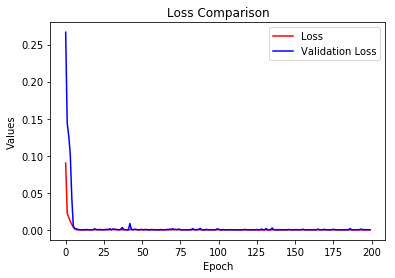

In [11]:
plt.plot(history.history["loss"],color = 'red', label = 'Loss')
plt.plot(history.history["val_loss"],color = 'blue', label = 'Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Values')
plt.legend()
plt.show()

In [22]:
real_stock_price = sc.inverse_transform(y_test.reshape(-1,1))

In [23]:
#Getting predicted stock price
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(np.shape(predicted_stock_price))
print(predicted_stock_price)
print(real_stock_price)

(506, 1)
[[438.3261 ]
 [442.61685]
 [438.16757]
 [434.69186]
 [459.9561 ]
 [445.70166]
 [451.52383]
 [456.69403]
 [454.81796]
 [463.6149 ]
 [460.1555 ]
 [457.05157]
 [476.67535]
 [454.32922]
 [446.33963]
 [451.32706]
 [450.79587]
 [446.6914 ]
 [457.55432]
 [456.82858]
 [451.93735]
 [446.37665]
 [442.70428]
 [446.75412]
 [457.28586]
 [446.5129 ]
 [451.05133]
 [461.16794]
 [463.74078]
 [458.60196]
 [450.06653]
 [444.91443]
 [488.36707]
 [461.69937]
 [476.3677 ]
 [484.618  ]
 [481.4798 ]
 [490.6158 ]
 [490.99274]
 [484.45773]
 [485.5517 ]
 [489.64175]
 [490.93826]
 [469.46545]
 [465.65414]
 [471.5467 ]
 [460.98798]
 [467.41956]
 [467.5848 ]
 [456.97104]
 [463.8812 ]
 [468.24786]
 [465.59927]
 [455.62253]
 [448.57278]
 [444.8219 ]
 [438.5246 ]
 [464.94733]
 [457.17288]
 [453.07578]
 [457.4427 ]
 [468.43808]
 [458.86273]
 [493.27557]
 [480.47797]
 [482.23688]
 [487.4236 ]
 [493.47623]
 [497.08243]
 [506.2756 ]
 [500.2419 ]
 [504.5469 ]
 [506.42105]
 [506.7836 ]
 [527.6003 ]
 [527.9617 ]
 [5

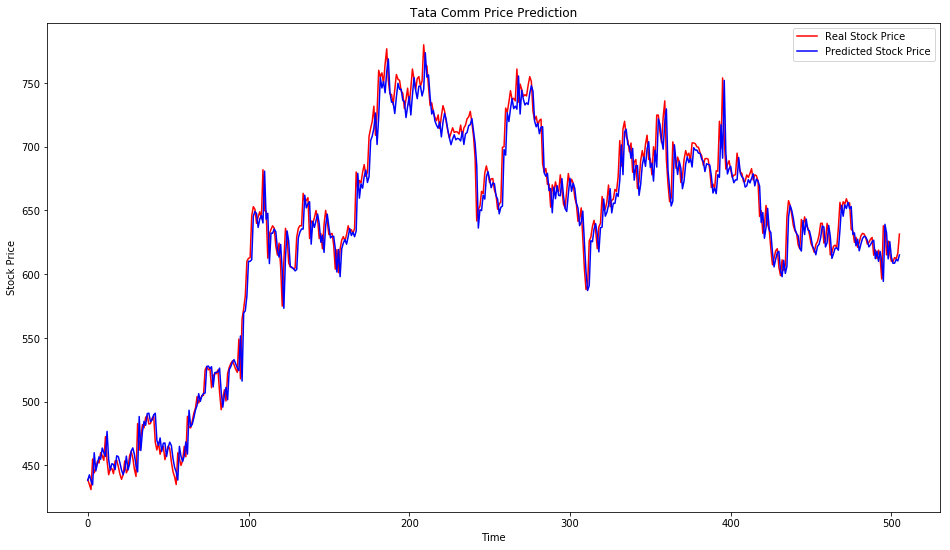

In [24]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.plot(real_stock_price,color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price,color = 'blue', label = 'Predicted Stock Price')
plt.title('Tata Comm Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('tata_comm_'+str(t)+'.png')
plt.show()

In [15]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))
print(rmse/np.average(real_stock_price))

0.021848520786653475


In [16]:
regressor.save('tata_comm_'+str(t)+'.h5')

In [17]:
from keras.models import load_model
regressor = load_model('tata_comm_'+str(t)+'.h5')

In [18]:
X,Y = [],[]
past_days = 8
for i in range(len(training_set)-past_days-1,len(training_set)-t):
    X.append(training_set[i+1:(i+t+1),0])
    Y.append(training_set[(i+t),0])
X = np.array(X)
Y = np.array(Y)
X = np.reshape(X,(X.shape[0],X.shape[1],1))
print(X.shape)
print(Y.shape)
print(X)
print(Y)

(2, 7, 1)
(2,)
[[[0.75824176]
  [0.74262166]
  [0.733281  ]
  [0.73312402]
  [0.73783359]
  [0.73657771]
  [0.7433281 ]]

 [[0.74262166]
  [0.733281  ]
  [0.73312402]
  [0.73783359]
  [0.73657771]
  [0.7433281 ]
  [0.76687598]]]
[0.7433281  0.76687598]


In [19]:
real_stock_price = sc.inverse_transform(Y.reshape(-1,1))

In [20]:
predicted_stock_price = regressor.predict(X)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(np.shape(predicted_stock_price))
print(predicted_stock_price)
print(real_stock_price)

(2, 1)
[[615.09753]
 [630.1467 ]]
[[616.5]
 [631.5]]
